In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from models import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Load data
train = np.genfromtxt('./data/training.csv', delimiter=',')
test = np.genfromtxt('./data/testing.csv', delimiter=',')

# Training data params
n_classes = 4 # Number of classes 
n_features = 27 # Number of features

In [68]:
# Divide the training data set
x_train, x_test = train[:,1:], test[:,1:]
y_train, y_test = train[:,0].astype(int), test[:,0].astype(int)
y_train, y_test = one_hot(y_train, n_classes), one_hot(y_test, n_classes) # One hot encoding

# Preprocessing - Standarization - zero mean and unit variance
# Recall that the mean and std come from the training set  
x_train, x_test = standarization(x_train, x_test) 

## Ex 1.5 - Multinomial logistic regression - GD

iter : 100/1000 - train_loss = 106.12, train_acc = 0.89, test_loss = 231.33, test_acc = 0.78
iter : 200/1000 - train_loss = 72.75, train_acc = 0.93, test_loss = 207.01, test_acc = 0.81
iter : 300/1000 - train_loss = 58.46, train_acc = 0.93, test_loss = 201.01, test_acc = 0.81
iter : 400/1000 - train_loss = 50.42, train_acc = 0.93, test_loss = 200.38, test_acc = 0.82
iter : 500/1000 - train_loss = 45.22, train_acc = 0.93, test_loss = 202.03, test_acc = 0.82
iter : 600/1000 - train_loss = 41.55, train_acc = 0.93, test_loss = 204.86, test_acc = 0.83
iter : 700/1000 - train_loss = 38.81, train_acc = 0.94, test_loss = 208.37, test_acc = 0.83
iter : 800/1000 - train_loss = 36.69, train_acc = 0.95, test_loss = 212.29, test_acc = 0.82
iter : 900/1000 - train_loss = 34.99, train_acc = 0.95, test_loss = 216.44, test_acc = 0.82
iter : 1000/1000 - train_loss = 33.59, train_acc = 0.95, test_loss = 220.74, test_acc = 0.82



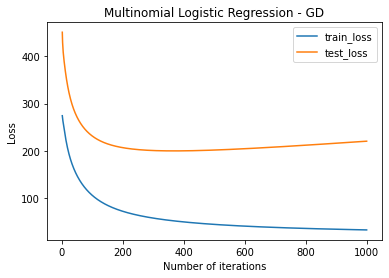

In [69]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - GD')
plt.legend();

## 1.7 - Multinomial logistic regression - SGD

### 1.7.1 SGD - Batch_size = 1

iter : 500/5000 - train_loss = 213.20, train_acc = 0.52, test_loss = 333.26, test_acc = 0.60
iter : 1000/5000 - train_loss = 136.39, train_acc = 0.88, test_loss = 273.94, test_acc = 0.76
iter : 1500/5000 - train_loss = 118.02, train_acc = 0.88, test_loss = 232.76, test_acc = 0.75
iter : 2000/5000 - train_loss = 126.36, train_acc = 0.83, test_loss = 256.31, test_acc = 0.74
iter : 2500/5000 - train_loss = 94.55, train_acc = 0.88, test_loss = 233.21, test_acc = 0.73
iter : 3000/5000 - train_loss = 83.97, train_acc = 0.91, test_loss = 209.17, test_acc = 0.79
iter : 3500/5000 - train_loss = 83.39, train_acc = 0.90, test_loss = 220.28, test_acc = 0.80
iter : 4000/5000 - train_loss = 80.41, train_acc = 0.89, test_loss = 225.70, test_acc = 0.74
iter : 4500/5000 - train_loss = 85.48, train_acc = 0.88, test_loss = 231.98, test_acc = 0.74
iter : 5000/5000 - train_loss = 60.87, train_acc = 0.93, test_loss = 196.04, test_acc = 0.83



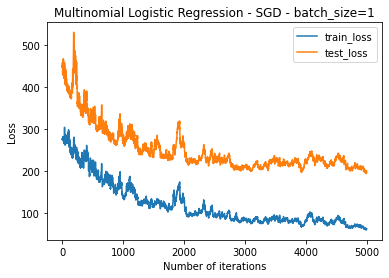

In [74]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 1 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.2 SGD - Batch_size = 16

iter : 500/5000 - train_loss = 58.41, train_acc = 0.93, test_loss = 212.16, test_acc = 0.82
iter : 1000/5000 - train_loss = 37.77, train_acc = 0.94, test_loss = 220.32, test_acc = 0.80
iter : 1500/5000 - train_loss = 31.27, train_acc = 0.95, test_loss = 227.78, test_acc = 0.82
iter : 2000/5000 - train_loss = 26.81, train_acc = 0.96, test_loss = 234.71, test_acc = 0.84
iter : 2500/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42
iter : 3000/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42
iter : 3500/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42
iter : 4000/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42
iter : 4500/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42
iter : 5000/5000 - train_loss = nan, train_acc = 0.30, test_loss = nan, test_acc = 0.42



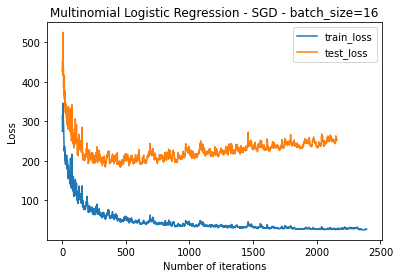

In [77]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 16 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.3 SGD - Batch_size = 32

iter : 100/1000 - train_loss = 101.57, train_acc = 0.90, test_loss = 227.29, test_acc = 0.80
iter : 200/1000 - train_loss = 67.87, train_acc = 0.93, test_loss = 205.07, test_acc = 0.82
iter : 300/1000 - train_loss = 59.21, train_acc = 0.91, test_loss = 204.25, test_acc = 0.79
iter : 400/1000 - train_loss = 43.63, train_acc = 0.94, test_loss = 196.23, test_acc = 0.82
iter : 500/1000 - train_loss = 43.72, train_acc = 0.94, test_loss = 206.52, test_acc = 0.81
iter : 600/1000 - train_loss = 38.03, train_acc = 0.95, test_loss = 202.03, test_acc = 0.83
iter : 700/1000 - train_loss = 36.87, train_acc = 0.95, test_loss = 213.06, test_acc = 0.82
iter : 800/1000 - train_loss = 42.72, train_acc = 0.95, test_loss = 238.04, test_acc = 0.81
iter : 900/1000 - train_loss = 36.39, train_acc = 0.94, test_loss = 227.06, test_acc = 0.83
iter : 1000/1000 - train_loss = 29.84, train_acc = 0.96, test_loss = 218.92, test_acc = 0.84



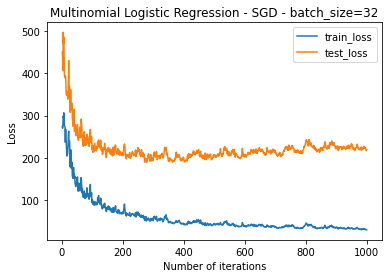

In [78]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0007 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 32 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();